# Exploring Luxembourg's Carnival through Digital Press Archives: A Case Study of Luxembourg City and Esch (1880-1970)

 ### Elisabeth Guerard [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-7742-4141) 
University of Luxembourg

This research proposes to examine carnival celebrations in Luxembourg's two main urban centers through the lens of digitized historical newspapers, using the Impresso (https://impresso-project.ch/) platform's corpus and API. Our study aims to understand how carnival practices were reported and evolved in Luxembourg City and Esch-sur-Alzette, with particular attention to the period spanning both World Wars.

By analyzing newspaper coverage, we will investigate several aspects of carnival culture: the types of events that received press attention, their locations (both indoor and outdoor venues), and their social accessibility as reflected in mask and ticket prices. The study will also explore how newspapers depicted different social groups and reported on public behavior during festivities.

Our methodology combines basic text analysis with geographical mapping to track mentions of venues, events, and prices. Special attention will be given to specific carnival formats like the "bal travesti" and their evolution over time. We will also examine how commercial aspects of carnival were presented through advertisement analysis.

The research will be conducted using Jupyter notebooks, making our methodology transparent and allowing other researchers to verify and build upon our findings. Through this initial exploration of Luxembourg's carnival traditions, we hope to contribute to our understanding of this important cultural practice while testing the potential of digital newspaper archives for cultural historical research.

## Introduction

In [ ]:
from impresso import connect
impresso = connect()

🎉 You are now connected to the Impresso API!  🎉


,count,label
value,,
local-elgu-1lI7Gbu9,85,carnavalesque
local-elgu-1lM_Wsz2,27,repas carnaval
local-elgu-2F2qwrjw,499,redoute

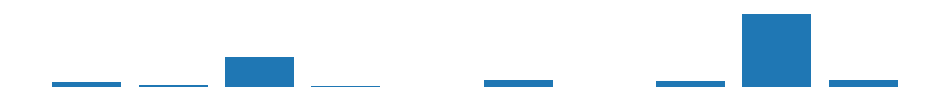

In [51]:
impresso.search.facet("collection")

In [ ]:
result = impresso.collections.find()
result

,title,description,accessLevel,createdAt,updatedAt,totalItems
uid,,,,,,
local-elgu-2F2qwrjw,redoute,containing redoute - tagged as advertisement;...,private,2025-06-09T20:03:02+00:00,2025-06-09T20:03:15.500000+00:00,499
local-elgu-IfsCx_3U,cavalcade,containing cavalcade - tagged as advertisemen...,private,2025-06-06T20:40:33+00:00,2025-06-06T20:40:37.902000+00:00,113
local-elgu-VodnHdpA,mi-careme,containing mi-carême - tagged as advertisemen...,private,2025-06-06T20:21:35+00:00,2025-06-06T20:21:39.608000+00:00,100


In [52]:
# By running this cell, you can find collections you have created (results ordered by size in descending order):
result = impresso.collections.find(order_by="-size")

# If no collections are found, print 'No collections found'
if result.size == 0:
    "No collections found"

# If collections are found, print number of collections, how many itens the first (biggest) collection contains, and the first item of the first collection

else:
    print("%s collections found" % result.size)
    first_collection_id = result.df.index[0]
    print("First collection contains %i items" % result.df["totalItems"].iloc[0])
    
    first_collection_items = impresso.search.find(collection_id=first_collection_id)
    print(
        "Got first %i items in the collection. The first item is: %s" % \
        (first_collection_items.size, first_collection_items.df["title"].iloc[0])
    )

10 collections found
First collection contains 10023 items
Got first 100 items in the collection. The first item is: Publicité 15 Page 4


In [70]:
result.df

,title,description,accessLevel,createdAt,updatedAt,totalItems
uid,,,,,,
local-elgu-YtG0FE-c,permis - prix -date to extract,containing carnaval AND permis published from...,private,2025-01-10T10:34:20+00:00,2025-01-10T10:34:28.016000+00:00,10023
local-elgu-Y10ZFslw,carnaval_carnavalesque,containing carnaval or carnavalesque - tagged...,private,2025-05-19T15:05:36+00:00,2025-05-19T15:06:11.252000+00:00,1205
local-elgu-2F2qwrjw,redoute,containing redoute - tagged as advertisement;...,private,2025-06-09T20:03:02+00:00,2025-06-09T20:03:15.500000+00:00,499
local-elgu-rSHnRZY3,bal and travesti,containing bal and travesti published from J...,private,2025-04-07T19:16:06+00:00,2025-04-07T19:16:11.648000+00:00,122
local-elgu-IfsCx_3U,cavalcade,containing cavalcade - tagged as advertisemen...,private,2025-06-06T20:40:33+00:00,2025-06-06T20:40:37.902000+00:00,113
local-elgu-VodnHdpA,mi-careme,containing mi-carême - tagged as advertisemen...,private,2025-06-06T20:21:35+00:00,2025-06-06T20:21:39.608000+00:00,100
local-elgu-1lI7Gbu9,carnavalesque,containing carnavalesque - tagged as advertis...,private,2025-04-14T14:19:26+00:00,2025-04-14T14:19:29.710000+00:00,85
local-elgu-dr3jMYht,bal masqué annonce,,private,2025-04-06T14:51:10+00:00,2025-04-14T14:12:52.285000+00:00,44
local-elgu-1lM_Wsz2,repas carnaval,containing carnaval or carnavalesque AND menu...,private,2025-05-19T20:36:52+00:00,2025-05-19T20:36:54.089000+00:00,27


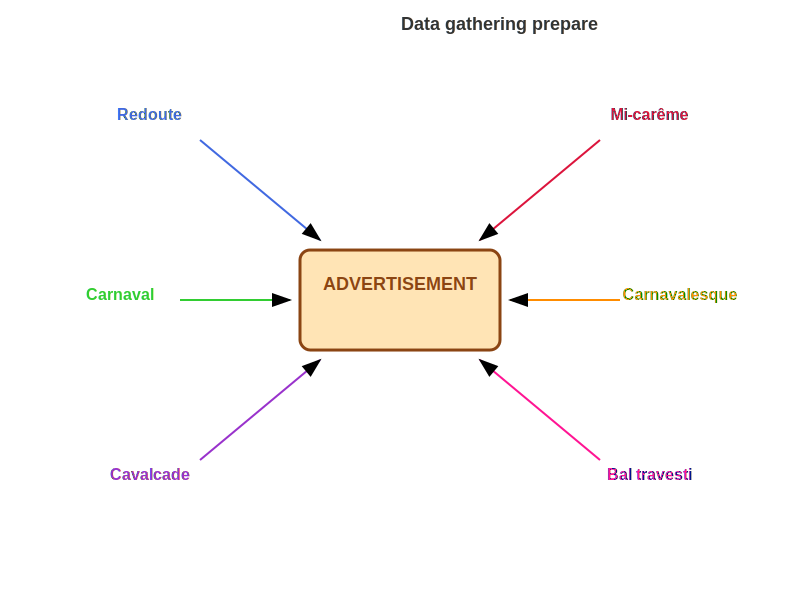

In [ ]:
from IPython.display import SVG, display
display(SVG('media/data_gathering_1_search.svg'))

Go to work with the following collections:

- local-elgu-Y10ZFslw	carnaval_carnavalesque
- local-elgu-2F2qwrjw	redoute
- local-elgu-rSHnRZY3	bal and travesti
- local-elgu-IfsCx_3U	cavalcade
- local-elgu-VodnHdpA	mi-careme
- local-elgu-1lI7Gbu9	carnavalesque

In [84]:
# Debug: Print the number of items in each collection before concatenation
import pandas as pd

collection_ids = ["local-elgu-Y10ZFslw","local-elgu-2F2qwrjw","local-elgu-rSHnRZY3","local-elgu-IfsCx_3U","local-elgu-VodnHdpA","local-elgu-1lI7Gbu9"]
dfs = []
for cid in collection_ids:
    result = impresso.collections.get(cid)
    colection_id = result.raw["uid"]
    items = impresso.collections.items(colection_id, limit=4000)
    print(f"Collection {cid} has {items.size} items")
    df_temp = items.df
    dfs.append(df_temp)

# Concatenate all dataframes
df_all = pd.concat(dfs)

# Drop duplicate indices to ensure unique index (keeping the first occurrence)
df_all = df_all[~df_all.index.duplicated(keep='first')]

# Save to CSV
df_all.to_csv('dataset/all_advertsement_unique.csv', index=True)

Collection local-elgu-Y10ZFslw has 1000 items
Collection local-elgu-2F2qwrjw has 499 items
Collection local-elgu-rSHnRZY3 has 122 items
Collection local-elgu-IfsCx_3U has 113 items
Collection local-elgu-VodnHdpA has 100 items
Collection local-elgu-1lI7Gbu9 has 85 items


1919 items - 1781 items

In [92]:
# Try semicolon separator
df_extra = pd.read_csv('dataset/collection_local-elgu-Y10ZFslw.csv', 
                      index_col=0, 
                      sep=';')

In [93]:
# due to limitation to 1000 items per collections
# load the collection exported by the impresso app and concatenate to the other
# Load the exported collection as a DataFrame


# Concatenate with df_all and drop duplicates based on the index
df_all = pd.concat([df_all, df_extra])
df_all = df_all[~df_all.index.duplicated(keep='first')]

# Save the updated DataFrame to CSV
df_all.to_csv('dataset/all_collections_unique.csv', index=True)

1944 items

### Data cleaning

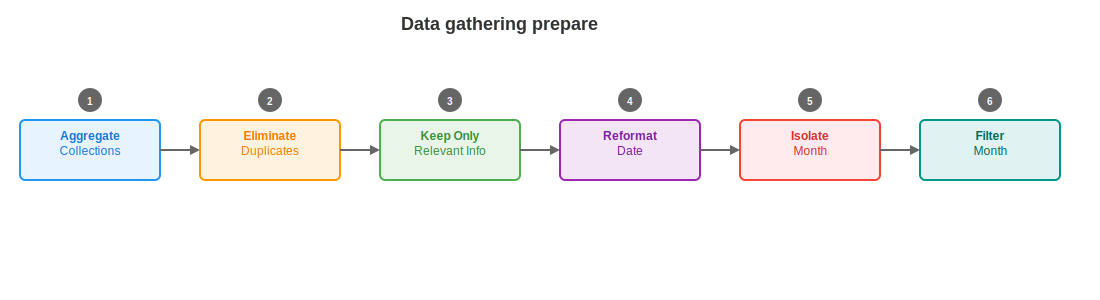

In [35]:
from IPython.display import SVG, display
display(SVG('media/data_gathering_2_prepare.svg'))

#### Publication date

In [94]:
# Keep only the specified columns in df
columns_to_keep = ['type', 'title', 'transcript', 'languageCode', 'publicationDate', 'mediaCode']
df = df_all[columns_to_keep]
df.head()

,type,title,transcript,languageCode,publicationDate,mediaCode
uid,,,,,,
tageblatt-1948-01-06-a-i0087,ad,Gemeinde Kayi vergibt auf dem,,de,1948-01-06T00:00:00+00:00,tageblatt
tageblatt-1939-01-30-a-i0100,ad,CARNAVAL DE NICE Arrangements speciaux,,de,1939-01-30T00:00:00+00:00,tageblatt
dunioun-1948-02-03-a-i0078,ad,Publicité 6 Page 6,,lb,1948-02-03T00:00:00+00:00,dunioun
luxwort-1949-01-21-a-i0134,ad,Pub. 68 Page 9,,de,1949-01-21T00:00:00+00:00,luxwort
tageblatt-1935-06-25-a-i0081,ad,"I~J~Ji i Mercredi, le 26",,de,1935-06-25T00:00:00+00:00,tageblatt


In [96]:
import pandas as pd
# Reformat the 'publicationDate' column to 'YYYY-MM-DD' format using .loc

df.loc[:, 'publicationDate'] = pd.to_datetime(df['publicationDate'], errors='coerce').dt.strftime('%Y-%m-%d')
df.head()


,type,title,transcript,languageCode,publicationDate,mediaCode
uid,,,,,,
tageblatt-1948-01-06-a-i0087,ad,Gemeinde Kayi vergibt auf dem,,de,1948-01-06,tageblatt
tageblatt-1939-01-30-a-i0100,ad,CARNAVAL DE NICE Arrangements speciaux,,de,1939-01-30,tageblatt
dunioun-1948-02-03-a-i0078,ad,Publicité 6 Page 6,,lb,1948-02-03,dunioun
luxwort-1949-01-21-a-i0134,ad,Pub. 68 Page 9,,de,1949-01-21,luxwort
tageblatt-1935-06-25-a-i0081,ad,"I~J~Ji i Mercredi, le 26",,de,1935-06-25,tageblatt


### Isolate months

In [97]:
# Ensure we are working on the original DataFrame, not a view
df = df.copy()
# Create a new column 'publicationMonth' extracting the month in 'MM' format from 'publicationDate'
df.loc[:, 'publicationMonth'] = pd.to_datetime(df['publicationDate'], errors='coerce').dt.strftime('%m')
df.head()

,type,title,transcript,languageCode,publicationDate,mediaCode,publicationMonth
uid,,,,,,,
tageblatt-1948-01-06-a-i0087,ad,Gemeinde Kayi vergibt auf dem,,de,1948-01-06,tageblatt,01
tageblatt-1939-01-30-a-i0100,ad,CARNAVAL DE NICE Arrangements speciaux,,de,1939-01-30,tageblatt,01
dunioun-1948-02-03-a-i0078,ad,Publicité 6 Page 6,,lb,1948-02-03,dunioun,02
luxwort-1949-01-21-a-i0134,ad,Pub. 68 Page 9,,de,1949-01-21,luxwort,01
tageblatt-1935-06-25-a-i0081,ad,"I~J~Ji i Mercredi, le 26",,de,1935-06-25,tageblatt,06


In [99]:
df.to_csv('dataset/all_collections_clean.csv', index=True)

In [101]:
import plotly.express as px

# Count the number of publications per month (as string '01', '02', ..., '12')
month_counts = df['publicationMonth'].value_counts().sort_index()


# Prepare month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Ensure all 12 months are present in the data
month_counts_full = month_counts.reindex([f"{i:02d}" for i in range(1, 13)], fill_value=0)
month_counts_full.index = month_labels

# Define 12 distinct colors
colors = px.colors.qualitative.Plotly[:12]

fig = px.pie(
    names=month_counts_full.index,
    values=month_counts_full.values,
    color=month_counts_full.index,
    color_discrete_sequence=colors,
    title='Publications per Month'
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
from script.build_url import uid_to_url

# Add a new column 'impressoUrl' by applying uid_to_url to each uid in the index
df['impressoUrl'] = df.index.to_series().apply(uid_to_url)
df.head()

/var/folders/nh/rc7pmmz52cb_sr450pk7thd0p31hyt/T/ipykernel_34758/744862008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['impressoUrl'] = df.index.to_series().apply(uid_to_url)


,type,title,transcript,languageCode,publicationDate,mediaCode,impressoUrl
uid,,,,,,,
tageblatt-1935-06-25-a-i0081,ad,"I~J~Ji i Mercredi, le 26",,de,1935-06-25,tageblatt,https://impresso-project.ch/app/issue/tageblat...
tageblatt-1935-08-10-a-i0128,ad,#6 st »y^nfslfeM RADIO LUXEMBOURG,,fr,1935-08-10,tageblatt,https://impresso-project.ch/app/issue/tageblat...
dunioun-1947-03-10-a-i0067,ad,Publicité 2 Page 4,,fr,1947-03-10,dunioun,https://impresso-project.ch/app/issue/dunioun-...
luxembourg1935-1938-02-18-a-i0074,ad,Publicité 5 Page 6,,fr,1938-02-18,luxembourg1935,https://impresso-project.ch/app/issue/luxembou...
dunioun-1948-02-07-a-i0156,ad,Publicité 13 Page 10,,fr,1948-02-07,dunioun,https://impresso-project.ch/app/issue/dunioun-...


## Extract event

In [13]:
# Import the extractor module or class
import os
from script.event_extractor import EventExtractor
from dotenv import load_dotenv
# Take from .env
# Load environment variables from a .env file
load_dotenv()

# Retrieve the API key from the environment variable
api_key = os.getenv("ANTHROPIC_API_KEY")
  
    
if not api_key:
    print("Please set your ANTHROPIC_API_KEY environment variable")

    
extractor = EventExtractor(api_key)



content_item = impresso.content_items.get("luxwort-1924-03-01-a-i0045")
key = "luxwort-1924-03-01-a-i0045"
publicationDate = content_item.pydantic.publicationDate
transcript = content_item.pydantic.transcript

# Call the method in event_extractor
extractor.extract_event_csv(key, transcript, publicationDate)

In [10]:
content_item = impresso.content_items.get("luxwort-1925-02-21-a-i0054")
publicationDate = content_item.pydantic.publicationDate
formatted_date = publicationDate.strftime('%Y-%m-%d-%H:%M:%S')
formatted_date


'1925-02-21-00:00:00'

In [28]:
# Import the extractor module or class
import os
from script.event_extractor import EventExtractor
from dotenv import load_dotenv
# Take from .env
# Load environment variables from a .env file
load_dotenv()

# Retrieve the API key from the environment variable
api_key = os.getenv("ANTHROPIC_API_KEY")
  
    
if not api_key:
    print("Please set your ANTHROPIC_API_KEY environment variable")

    
extractor = EventExtractor(api_key)


for index, row in df.iterrows():    
    content_item = impresso.content_items.get(index)
    key = content_item.pydantic.uid
    transcript = content_item.pydantic.transcript
    publicationDate = content_item.pydantic.publicationDate
    # Call the method in event_extractor
    extractor.extract_event_csv(key, transcript,publicationDate )

In [8]:
content_item.pydantic.transcript

'Hotel Metropole ♦ Bal Carnavalesque Lundi soil. - Entree libie. '

De l'uid , si on veut l'url:
tageblatt-1939-02-11-a-i0117

https://impresso-project.ch/app/issue/tageblatt-1939-02-11-a/view?p=4&articleId=i0117


In [14]:
df

,type,title,transcript,locations,persons,topics,transcriptLength,totalPages,languageCode,isOnFrontPage,publicationDate,countryCode,dataProviderCode,mediaCode,mediaType
uid,,,,,,,,,,,,,,,
obermosel-1939-02-18-a-i0159,ad,Publicité 7 Page 3,,[],[],"[{'uid': 'tm-de-all-v2.0_tp19_de', 'relevance'...",10,1,de,False,1939-02-18T00:00:00+00:00,LU,BNL,obermosel,newspaper
tageblatt-1939-02-11-a-i0117,ad,llflMQ SAMEDI Grande Soiree Carnavalesque,,[],[],"[{'uid': 'tm-de-all-v2.0_tp01_de', 'relevance'...",13,1,de,False,1939-02-11T00:00:00+00:00,LU,BNL,tageblatt,newspaper
tageblatt-1950-03-18-a-i0187,ad,"POLE NORD LUXEMBOURG DIMANCHE, M",,[{'uid': 'aida-0001-54-Nord_$28$French_departm...,[],"[{'uid': 'tm-de-all-v2.0_tp00_de', 'relevance'...",15,1,de,False,1950-03-18T00:00:00+00:00,LU,BNL,tageblatt,newspaper
tageblatt-1930-02-27-a-i0106,ad,SOUPER CARNAVALESQUE au PARIS-PALACE chez,,"[{'uid': 'aida-0001-54-Luxembourg', 'relevance...",[],"[{'uid': 'tm-de-all-v2.0_tp02_de', 'relevance'...",21,1,de,False,1930-02-27T00:00:00+00:00,LU,BNL,tageblatt,newspaper
tageblatt-1936-02-22-a-i0120,ad,ASSOCIATION DES COMMERQANTS ESCH. SOIREE,,[],[],"[{'uid': 'tm-de-all-v2.0_tp02_de', 'relevance'...",23,1,de,False,1936-02-22T00:00:00+00:00,LU,BNL,tageblatt,newspaper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
indeplux-1893-02-07-a-i0019,ad,Publicité 3 Page 4,,"[{'uid': 'aida-0001-54-Eisbären_Berlin', 'rele...","[{'uid': 'aida-0001-50-Jason_Mercier', 'releva...","[{'uid': 'tm-fr-all-v2.0_tp39_fr', 'relevance'...",705,1,fr,False,1893-02-07T00:00:00+00:00,LU,BNL,indeplux,newspaper
luxwort-1883-01-24-a-i0014,ad,Pub. 1 Page 4,,[{'uid': 'aida-0001-54-Nord_$28$French_departm...,[],"[{'uid': 'tm-de-all-v2.0_tp11_de', 'relevance'...",1978,1,de,False,1883-01-24T00:00:00+00:00,LU,BNL,luxwort,newspaper
luxwort-1925-02-21-a-i0053,ad,Pub. 18 Page 5,,"[{'uid': 'aida-0001-54-Volkswagen_Type_2', 're...",[],"[{'uid': 'tm-de-all-v2.0_tp02_de', 'relevance'...",1841,1,de,False,1925-02-21T00:00:00+00:00,LU,BNL,luxwort,newspaper


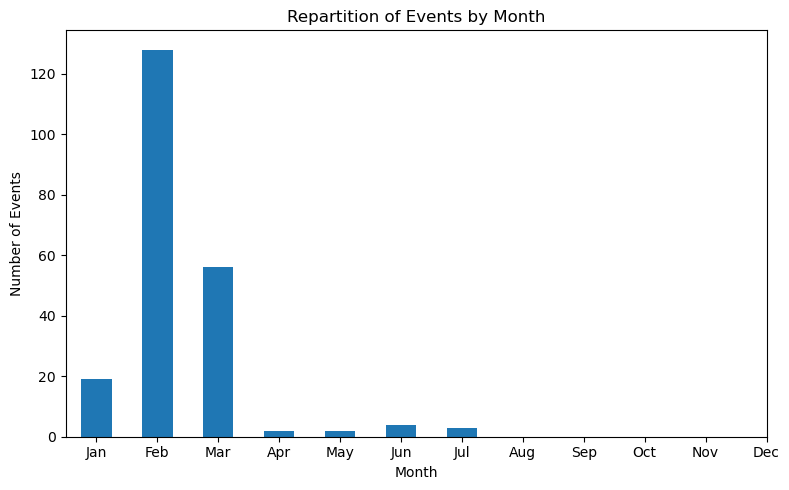

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
events_df = pd.read_csv('event.csv')

# Extract the month from the publication date
# Use 'mixed' format to handle both "%Y-%m-%d" and "%Y-%m-%d-%H:%M:%S"
events_df['month'] = pd.to_datetime(events_df['publication_date'], format='mixed', errors='coerce').dt.month
# Adjust the date parsing to match the format in your CSV
# Try parsing with '%Y-%m-%d' instead of '%Y-%m-%d-%H:%M:%S'


# Count the number of events per month
month_counts = events_df['month'].value_counts().sort_index()

# Plot the repartition of events by month
plt.figure(figsize=(8, 5))
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Repartition of Events by Month')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=0)
plt.tight_layout()
plt.show()

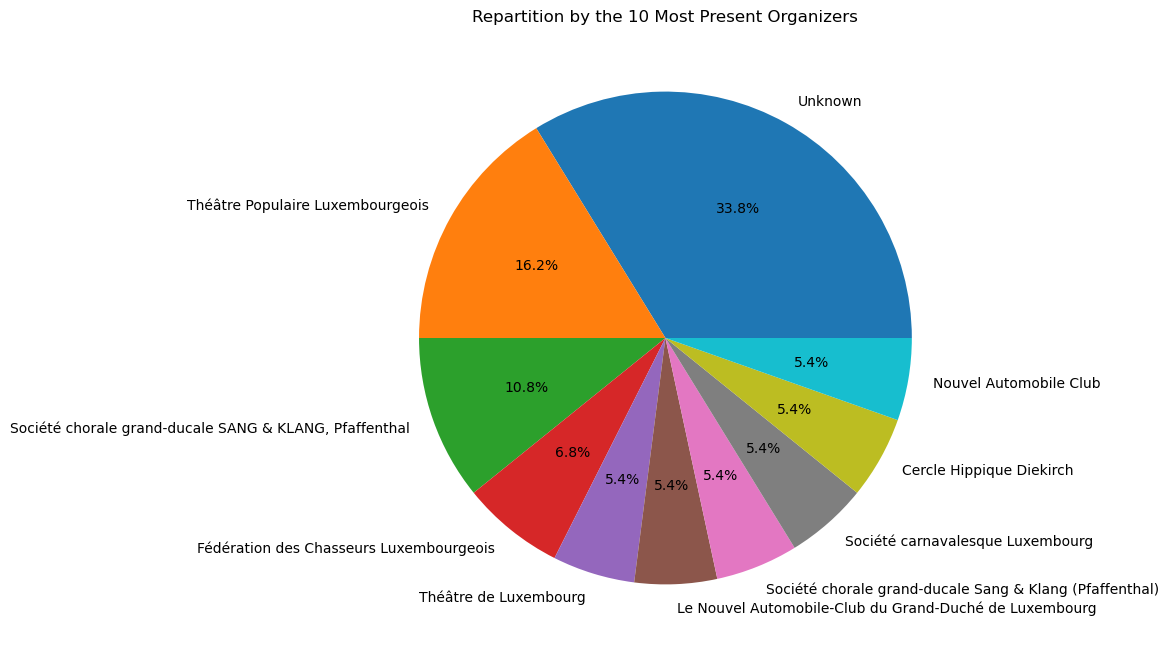

In [30]:
import matplotlib.pyplot as plt

# Count the occurrences of each organizer
organizer_counts = events_df['organizer'].value_counts().head(10)
# Replace NaN values in the 'organizer' column with 'Unknown'
organizer_counts = events_df['organizer'].fillna('Unknown').value_counts().head(10)
# Plot a pie chart
plt.figure(figsize=(8, 8))
organizer_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.ylabel('')
plt.title('Repartition by the 10 Most Present Organizers')
plt.show()

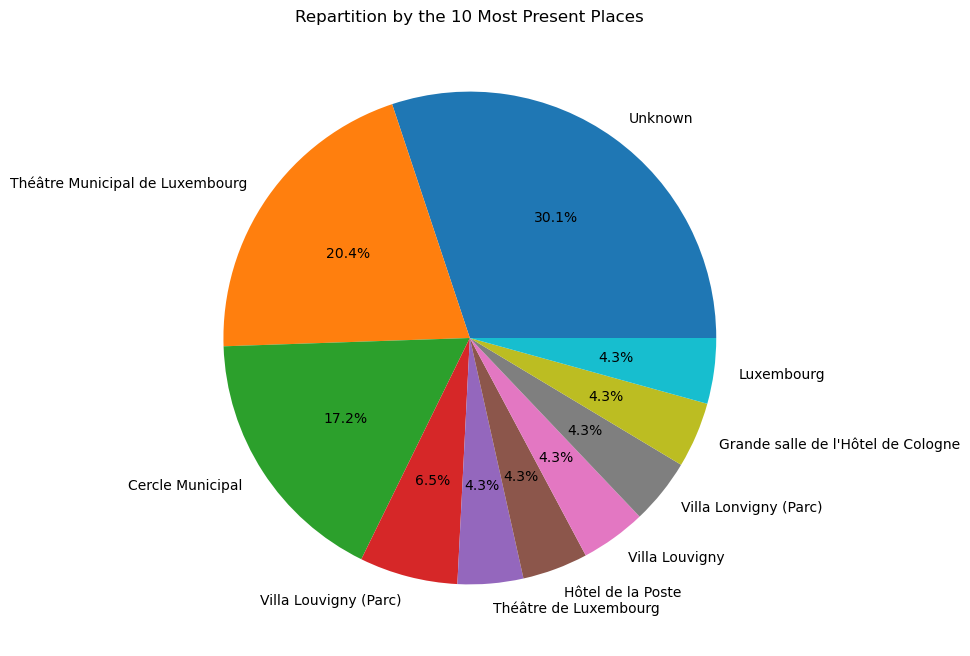

In [31]:
import matplotlib.pyplot as plt

# Replace NaN values in 'place' and 'organizer' columns with 'Unknown'
events_df['place'] = events_df['place'].fillna('Unknown')


# Count the occurrences of each place, considering only the 10 most frequent
place_counts = events_df['place'].value_counts().head(10)

# Plot a pie chart for the 10 most present places
plt.figure(figsize=(8, 8))
place_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.ylabel('')
plt.title('Repartition by the 10 Most Present Places')
plt.show()

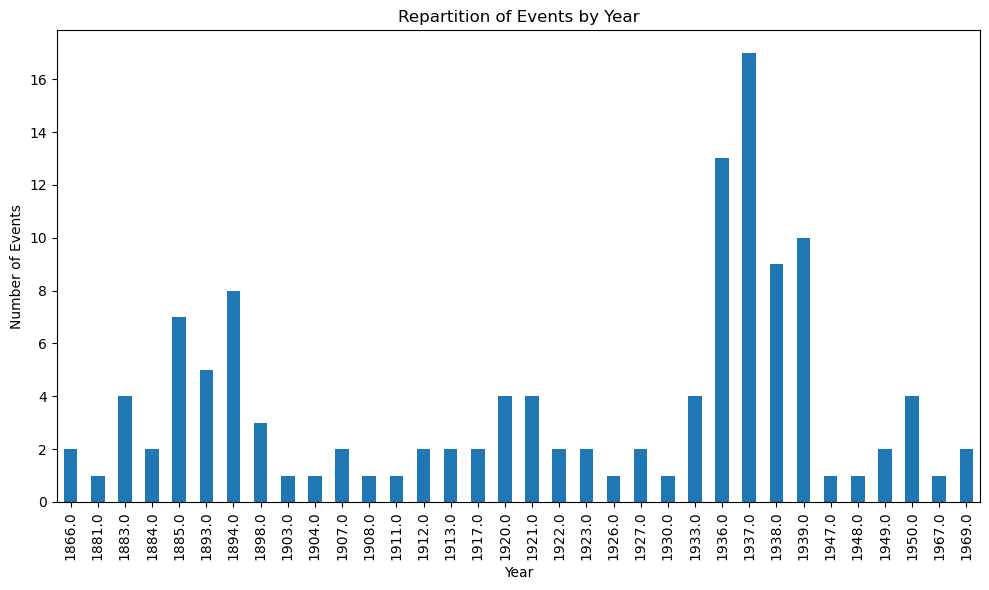

In [34]:
import matplotlib.pyplot as plt
# Fill missing years with 0 events
all_years = range(int(events_df['year'].min()), int(events_df['year'].max()) + 1)
year_counts = year_counts.reindex(all_years, fill_value=0)
# Extract the year from the publication_date or event_date
events_df['year'] = pd.to_datetime(events_df['event_date'].fillna(events_df['publication_date']), errors='coerce').dt.year

# Count the number of events per year
year_counts = events_df['year'].value_counts().sort_index()

# Plot the repartition of events by year
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Repartition of Events by Year')
plt.tight_layout()
plt.show()

In [37]:

import pandas as pd

# Load the CSV file
events_df = pd.read_csv('event.csv')

# Add a 'year' column based on 'event_date' if available, otherwise 'publication_date'
events_df['year'] = pd.to_datetime(
    events_df['event_date'].fillna(events_df['publication_date']),
    errors='coerce'
).dt.year

# Save the updated dataframe back to event.csv
events_df.to_csv('event.csv', index=False)



# References

- Visualisation, [flourish](https://app.flourish.studio/templates)
- Video training LLM
    * Lesson 1: https://videos.uni.lu/media/LLM+Teaching+C2DH+-+Gabor+Toth+-+Lesson+1/1_qm33o547
    * Lesson 2: https://videos.uni.lu/media/EDU-2025-03-05-LLM+Teaching+C2DH+-+Gabor+Toth+Lesson+2/1_412j7z2a
    * Lesson 3: https://videos.uni.lu/media/EDU-2025-03-05-LLM+Teaching+C2DH+-+Gabor+Toth+Lesson+3/1_rfs7gjgt
- Notion event from Sarah Oberlicher /Users/elisabeth.guerard/Documents/meetings/meeting/AI working group/Hands-on History -Argumentative Patterns in the 1908 Messina Earthquake News Coverage.md
- Laura Steil 